# Scikit-Learn & Clustering

## Scaling with Scikit-Learn Transformers

In [2]:
import pandas as pd
food = pd.read_csv("data/food_ratings.csv", nrows=12)
food.set_index("student", inplace=True)
food.drop(columns=["favorite_color"], inplace=True)

In [3]:
food

broccoli  brussels_sprouts  hamburger  oysters (raw)  \
student                                                              
Akbar                7                 0          5              2   
Andreas              7                 7          8              1   
Dónal                8                 6          8              5   
Hana                 5                 8          8              8   
Konstantinos         5                 7          1              0   
Kristina             9                 8          5              0   
Sabrina              6                 8         10              0   
Sandrine            10                 2          8              0   
Sevgi                6                 2          9              0   
Rias                 8                 6          8              5   
Ben                  8                 8          5              4   
Joan                 6                 0          8              0   

               onion (raw)  peas  olives  blue_cheese  whisky  age  
student                                                             
Akbar                    3     4       8            8       7   32  
Andreas                  7     3       3            5       7   34  
Dónal                    1     5       8           10      10   35  
Hana                     5     7       9            8       7   31  
Konstantinos             7     8      10            2       7   28  
Kristina                 7     7       9            4       7   36  
Sabrina                  8     8      10            0       2   30  
Sandrine                 5     8      10           10       0   41  
Sevgi                    5     7      10            0       0   38  
Rias                     0     6       8            8      10   33  
Ben                      5     9      10            9      10   35  
Joan                     7     2       8            9       6   88

Using a transformer in 4 simple steps:

1. Import it from the appropriate sklearn submodule (google search + docs!)
2. Initialize it with the appropriate parameters
3. Fit it to your data
4. Use it to transform the data

In [3]:
# 1. import
from sklearn.preprocessing import MinMaxScaler

# 2. initialize
minmax = MinMaxScaler(feature_range=(0,1))

# 3. fit
minmax.fit(food)

MinMaxScaler()

In [4]:
# 4. transform
food_scaled = minmax.transform(food)

In [5]:
food_scaled = pd.DataFrame(food_scaled, columns = food.columns, index = food.index)

In [6]:
food_scaled

broccoli  brussels_sprouts  hamburger  oysters (raw)  \
student                                                              
Akbar              0.4             0.000   0.444444          0.250   
Andreas            0.4             0.875   0.666667          0.250   
Dónal              0.6             0.750   0.777778          0.625   
Hana               0.0             1.000   0.777778          1.000   
Konstantinos       0.0             0.875   0.000000          0.000   
Kristina           0.8             1.000   0.444444          0.000   
Sabrina            0.2             1.000   1.000000          0.000   
Sandrine           1.0             0.250   0.777778          0.000   
Sevgi              0.2             0.250   0.888889          0.000   
Rias               0.6             0.750   0.777778          0.625   
Ben                0.6             1.000   0.444444          0.500   
Joan               0.2             0.000   0.777778          0.000   

               onion (raw)      peas    olives  blue_cheese  whisky       age  
student                                                                        
Akbar                0.375  0.285714  0.714286          0.8     0.7  0.066667  
Andreas              0.750  0.000000  0.000000          0.5     0.6  0.100000  
Dónal                0.125  0.428571  0.714286          1.0     1.0  0.116667  
Hana                 0.625  0.714286  0.857143          0.8     0.7  0.050000  
Konstantinos         0.875  0.857143  1.000000          0.2     0.7  0.000000  
Kristina             0.875  0.714286  0.857143          0.4     0.7  0.133333  
Sabrina              1.000  0.857143  1.000000          0.0     0.2  0.033333  
Sandrine             0.625  0.857143  1.000000          1.0     0.0  0.216667  
Sevgi                0.625  0.714286  1.000000          0.0     0.0  0.166667  
Rias                 0.000  0.571429  0.714286          0.8     1.0  0.083333  
Ben                  0.625  1.000000  1.000000          0.9     1.0  0.116667  
Joan                 0.875  0.000000  0.714286          0.9     0.6  1.000000

#### Exercise: standardize the data with a Scikit-Learn Transformer

#### Bonus: create a function to range-scale the data, and then turn that function into a Scikit-Learn Transformer using `FunctionTransformer`

In [46]:
## code here

## K-Means algorithm

In [47]:
# import
from sklearn.cluster import KMeans

# initialize with parameters
food_kmeans = KMeans(n_clusters = 3)

# fit
food_kmeans.fit(food)

In [50]:
food_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1], dtype=int32)

In [52]:
food_kmeans.cluster_centers_

array([[ 7.33333333,  4.        ,  9.        ,  0.        ,  6.        ,
         7.66666667, 10.        ,  3.33333333,  0.66666667, 36.33333333],
       [ 6.        ,  0.        ,  8.        ,  0.        ,  7.        ,
         2.        ,  8.        ,  9.        ,  6.        , 88.        ],
       [ 7.125     ,  6.25      ,  5.875     ,  3.25      ,  4.25      ,
         6.        ,  8.125     ,  6.75      ,  8.        , 33.        ]])

In [51]:
food["cluster"] = food_kmeans.labels_
food

broccoli  brussels_sprouts  hamburger  oysters (raw)  \
student                                                              
Akbar                7                 0          5              2   
Andreas              7                 7          7              2   
Dónal                8                 6          8              5   
Hana                 5                 8          8              8   
Konstantinos         5                 7          1              0   
Kristina             9                 8          5              0   
Sabrina              6                 8         10              0   
Sandrine            10                 2          8              0   
Sevgi                6                 2          9              0   
Rias                 8                 6          8              5   
Ben                  8                 8          5              4   
Joan                 6                 0          8              0   

               onion (raw)  peas  olives  blue_cheese  whisky  age  cluster  
student                                                                      
Akbar                    3     4       8            8       7   32        2  
Andreas                  6     2       3            5       6   34        2  
Dónal                    1     5       8           10      10   35        2  
Hana                     5     7       9            8       7   31        2  
Konstantinos             7     8      10            2       7   28        2  
Kristina                 7     7       9            4       7   36        2  
Sabrina                  8     8      10            0       2   30        0  
Sandrine                 5     8      10           10       0   41        0  
Sevgi                    5     7      10            0       0   38        0  
Rias                     0     6       8            8      10   33        2  
Ben                      5     9      10            9      10   35        2  
Joan                     7     2       8            9       6   88        1

In [1]:
# drop some columns and make different transformations
# cluster again and see how results change

# your code here

### The penguins dataset

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
penguins.drop(['species','island','sex'], axis=1, inplace=True)
penguins.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0

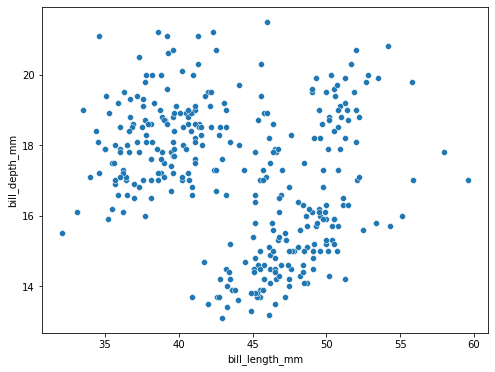

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.show()

In [13]:
peng_cl = penguins[['bill_length_mm','bill_depth_mm']]
peng_cl.head()

bill_length_mm  bill_depth_mm
0            39.1           18.7
1            39.5           17.4
2            40.3           18.0
4            36.7           19.3
5            39.3           20.6

### Data Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
peng_cl_norm = MinMaxScaler().fit_transform(peng_cl)

### K-means

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(peng_cl_norm)

KMeans(n_clusters=3)

In [16]:
kmeans.cluster_centers_

array([[0.54930303, 0.22480159],
       [0.24378378, 0.61357786],
       [0.64637762, 0.66703297]])

In [17]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['bill_length_mm','bill_depth_mm']
cl_pos

bill_length_mm  bill_depth_mm
0        0.549303       0.224802
1        0.243784       0.613578
2        0.646378       0.667033

### Explore model results

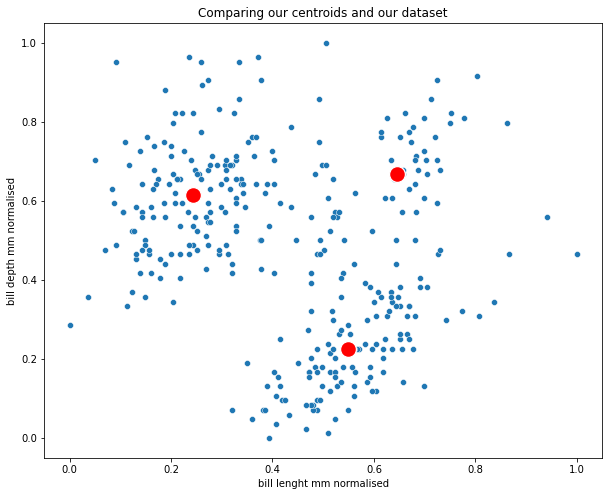

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(peng_cl_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('bill lenght mm normalised')
plt.ylabel('bill depth mm normalised')
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm')
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

In [19]:
penguins['cluster'] = kmeans.labels_
penguins.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  cluster
0            39.1           18.7              181.0       3750.0        1
1            39.5           17.4              186.0       3800.0        1
2            40.3           18.0              195.0       3250.0        1
4            36.7           19.3              193.0       3450.0        1
5            39.3           20.6              190.0       3650.0        1

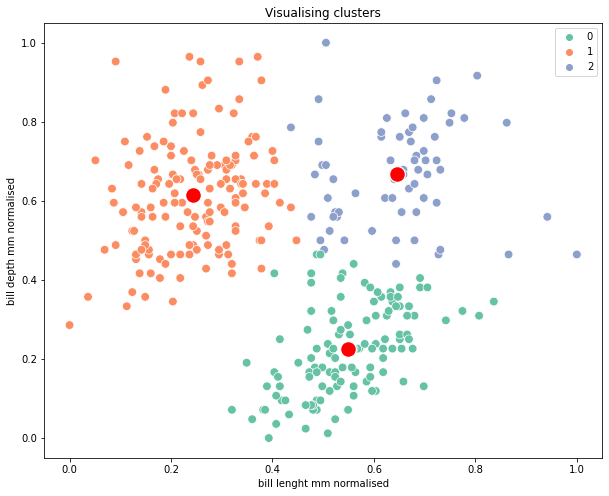

In [20]:
# create plot dataframe
plot_data = pd.DataFrame(peng_cl_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm']
plot_data['cluster'] = kmeans.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('bill lenght mm normalised')
plt.ylabel('bill depth mm normalised')

# scatter plot
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

The iterative nature of any data science process: 

![Data Science Process](https://www.researchgate.net/publication/322310310/figure/fig1/AS:611851016601600@1522888058853/CRISP-DM-methodology-Source-Chapman-et-al-2000.png)

### 2nd iteration

Cluster the penguins using all the features and a different scaling method.

In [57]:
## your code here

### Bonus: explore and visualize the clusters that emerged using spyder/radar charts

In [62]:
# Source: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
# your code here